# Ordinary differential equations
Implementation of the Euler, Heun and Runge-Kutta methods for nummerical integration.
Then testing those methods on some dynamical systems.

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
%matplotlib inline

In [2]:
def solve_ode(f, y0, t0, h, n, method):
    """Solve ordinary differential equations with a given initial value
    Args:
        f: function defining the ODE system
        y0: initial state at time t0
        t0: initial time
        h: step size
        n: number of steps
        method: "eurler", "heun", or "rk4"
    Returns:
        y: array of states for each step
    """

    y = np.zeros((n+1, len(y0)))
    y[0] = y0
    t = t0
    
    if method == 'euler':
        for i in range(n):
            y[i+1] = y[i] + h * f(t, y[i])
            t += h

    elif method == 'heun':
        for i in range(n):
            k = f(t, y[i])
            y[i+1] = y[i] + h / 2 * (k + f(t + h, y[i] + h * k))
            t += h

    elif method == 'rk4':
        for i in range(n):
            k1 = f(t, y[i])
            k2 = f(t + 0.5 * h, y[i] + 0.5 * h * k1) 
            k3 = f(t + 0.5 * h, y[i] + 0.5 * h * k2) 
            k4 = f(t + h, y[i] + h * k3)
            y[i+1] = y[i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
            t += h

    return y

## Chaotic systems
### Lorenz 63

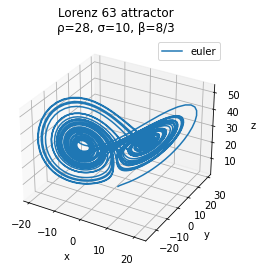

In [3]:
# Lorenz 63 parameters:
rho = 28
sigma = 10
beta = 8 / 3

def lorenz63(t, y):
    f0 = sigma * (y[1] - y[0])
    f1 = y[0] * (rho - y[2]) - y[1]
    f2 = y[0] * y[1] - beta * y[2]
    return np.array([f0, f1, f2])

y0 = [1.0, 1.0, 1.0]
t0 = 0
n = 5000
dt = 0.01

y_euler = solve_ode(lorenz63, y0, t0, dt, n, method='euler')
y_heun = solve_ode(lorenz63, y0, t0, dt, n, method='heun')
y_rk4 = solve_ode(lorenz63, y0, t0, dt, n, method='rk4')

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(y_euler[:, 0], y_euler[:, 1], y_euler[:, 2], label='euler')
#ax.plot(y_heun[:, 0], y_heun[:, 1], y_heun[:, 2], label='heun')
#ax.plot(y_rk4[:, 0], y_rk4[:, 1], y_rk4[:, 2], label='rk4')
plt.title('Lorenz 63 attractor\nρ=28, σ=10, β=8/3')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.draw()

### Rössler

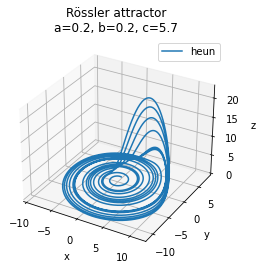

In [4]:
# Parameters:
a, b, c = 0.2, 0.2, 5.7

def rossler(t, y):
    f0 = - y[1] - y[2]
    f1 = y[0] + a * y[1]
    f2 = b + y[2] * (y[0] - c)
    return np.array([f0, f1, f2])

y0 = [0.0, 1.1, 0.0]
t0 = 0
n = 10_000
dt = 0.01

y_euler = solve_ode(rossler, y0, t0, dt, n, method='euler')
y_heun = solve_ode(rossler, y0, t0, dt, n, method='heun')
y_rk4 = solve_ode(rossler, y0, t0, dt, n, method='rk4')

fig = plt.figure()
ax = fig.gca(projection="3d")
#ax.plot(y_euler[:, 0], y_euler[:, 1], y_euler[:, 2], label='euler')
ax.plot(y_heun[:, 0], y_heun[:, 1], y_heun[:, 2], label='heun')
#ax.plot(y_rk4[:, 0], y_rk4[:, 1], y_rk4[:, 2], label='rk4')
plt.title(f'Rössler attractor\na={a}, b={b}, c={c}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.draw()

### Double pendulum

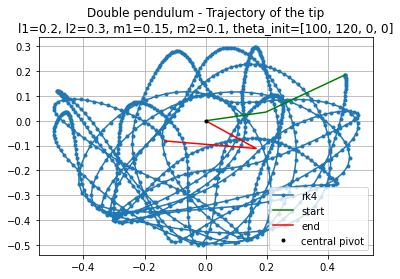

In [5]:
l1 = 0.2
l2 = 0.3
m1 = 0.150
m2 = 0.100
g = 9.81

def double_pendulum(t, y):
    
    theta1, theta2, omega1, omega2 = y
    theta_1minus2 = theta1 - theta2
    omega1sq_l1 = omega1**2 * l1
    omega2sq_l2 = omega2**2 * l2
    m_tot = m1 + m2
    
    num1 = - g*(m1+m_tot)*np.sin(theta1) - m2*g*np.sin(theta_1minus2-theta2) - 2*np.sin(theta_1minus2)*m2*(omega2sq_l2+omega1sq_l1*np.cos(theta_1minus2))
    num2 = 2*np.sin(theta_1minus2) * (omega1sq_l1*m_tot + g*m_tot*np.cos(theta1) + omega2sq_l2*m2*np.cos(theta_1minus2))
    denom = m_tot + m2 - m2*np.cos(2*theta_1minus2)
    
    d_omega1 = num1 / (l1*denom)
    d_omega2 = num2 / (l2*denom)
    
    return np.array([omega1, omega2, d_omega1, d_omega2])

theta0_degree = [100, 120, 0, 0]
theta0 = np.array(theta0_degree) * np.pi / 180
t0 = 0
n = 1000
dt = 0.01

theta = solve_ode(double_pendulum, theta0, t0, dt, n, method='rk4')

x1 = l1*np.sin(theta[:, 0])
y1 = - l1*np.cos(theta[:, 0])
x2 = x1 + l2*np.sin(theta[:, 1])
y2 = y1 - l2*np.cos(theta[:, 1])

plt.plot(x2, y2, '.-', label='rk4')
plt.plot([0, x1[0], x2[0]], [0, y1[0], y2[0]], color='g', label='start')
plt.plot([0, x1[-1], x2[-1]], [0, y1[-1], y2[-1]], color='r', label='end')
plt.plot(0, 0, '.', color='k', label='central pivot')
param_info = f'l1={l1}, l2={l2}, m1={m1}, m2={m2}, theta_init={theta0_degree}'
plt.title('Double pendulum - Trajectory of the tip\n'+param_info)
plt.legend()
plt.grid()

## Stiff equation
$y'(t) = -15 y(t)$ and $y(0) = 1$ <br>
Analytic solution: $y(t) = \mathrm{e}^{-15t}$

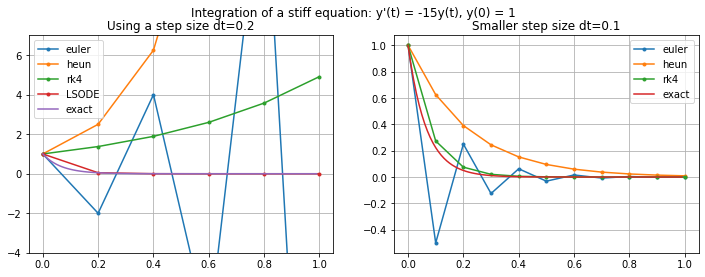

In [6]:
y0 = [1,]
t0 = 0
tf = 1

t_array = np.arange(t0, tf, 0.01)
y_exact = np.exp(-15 * t_array)

f_exp15 = lambda t,y: -15 * y

fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(12)

plt.suptitle("Integration of a stiff equation: y'(t) = -15y(t), y(0) = 1")

dt = 0.2
n = int((tf - t0) / dt)
t_values = np.arange(0, tf+dt, dt)
y_scipy = odeint(f_exp15, y0, t_values, tfirst=True)
plt.subplot(121)
plt.title(f'Using a step size dt={dt}')
for method in ('euler', 'heun', 'rk4'):
    y = solve_ode(f_exp15, y0, t0, dt, n, method)
    plt.plot(t_values, y, '.-', label=f'{method}')
plt.plot(t_values, y_scipy, '.-', label='LSODE')
plt.plot(t_array, y_exact, label='exact')
plt.ylim(-4, 7)
plt.legend()
plt.grid()
    

dt = 0.1
n = int((tf - t0) / dt)
t_values = np.arange(0, tf+dt, dt)
plt.subplot(122)
plt.title(f'Smaller step size dt={dt}')
for method in ('euler', 'heun', 'rk4'):
    y = solve_ode(f_exp15, y0, t0, dt, n, method)
    plt.plot(t_values, y, '.-', label=f'{method}')
plt.plot(t_array, y_exact, label='exact')
plt.legend()
plt.grid()

## Classical mechanics
### Free fall

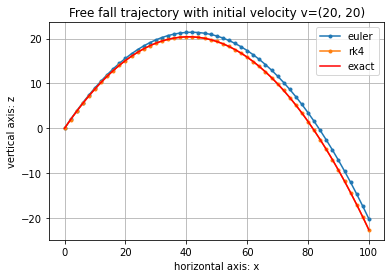

In [7]:
# SI units are used throughout the notebook
G = 6.67408e-11
R_EARTH = 6.371e6
M_EARTH = 5.9722e24
# Gravity acceleration:
#g = G * M_EARTH / R_EARTH ** 2
g = 9.81

def f_gravity_earth_surface(t, y):
    f0 = y[2]
    f1 = y[3]
    f2 = 0
    f3 = - g
    return np.array([f0, f1, f2, f3])

t0 = 0
dt = 0.1
tf = 5
x0 = (0, 0)
v0 = (20, 20)
n = int((tf - t0) / dt)
y0 = np.concatenate((x0, v0))

y_euler = solve_ode(f_gravity_earth_surface, y0, t0, dt, n, method='euler')
y_heun = solve_ode(f_gravity_earth_surface, y0, t0, dt, n, method='heun')
y_rk4 = solve_ode(f_gravity_earth_surface, y0, t0, dt, n, method='rk4')

t_values = np.arange(t0, tf + dt, dt)
y_exact = np.stack([
    v0[0] * t_values + x0[0],
    - g / 2 * t_values ** 2 + v0[1] * t_values + x0[1],
    v0[0] * np.ones(len(t_values)),
    - g * t_values + x0[1]
], axis=1)

plt.plot(y_euler[:, 0], y_euler[:, 1], '.-', label='euler')
#plt.plot(y_heun[:, 0], y_heun[:, 1], '.-', label='heun')
plt.plot(y_rk4[:, 0], y_rk4[:, 1], '.-', label='rk4')
plt.plot(y_exact[:, 0], y_exact[:, 1], '-', label='exact', color='r')

plt.title(f'Free fall trajectory with initial velocity v={v0}')
plt.xlabel('horizontal axis: x')
plt.ylabel('vertical axis: z')
plt.legend()
plt.grid()

### Drag force

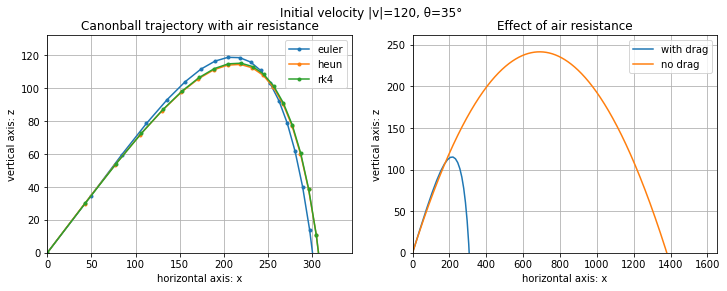

In [8]:
g = 9.81
rho_air = 1.225 # Mass density of air at 15°C, sea level
Cd_ball = 0.47 # Drag coefficiant of a ball
r_ball = 0.08 # radius of the ball
rho_iron = 7874 # Mass density of irob 15°C, atmospheric pressure
m_ball = rho_iron * 4/3 * np.pi * r_ball ** 3
A_ball = np.pi * r_ball ** 2 # Reference area of the ball

def f_ball(t, y):
    f0 = y[2]
    f1 = y[3]
    f2 = - 0.5 * rho_air * f0 ** 2 * Cd_ball * A_ball
    f3 = - g - 0.5 * rho_air * f1 ** 2 * Cd_ball * A_ball
    return np.array([f0, f1, f2, f3])

t0 = 0
dt = 0.5
tf = 10
x0 = (0, 0)
v0_norm = 120
v0_angle_degree = 35
v0_angle = v0_angle_degree * np.pi / 180
v0 = (v0_norm * np.cos(v0_angle), v0_norm * np.sin(v0_angle))
n = int((tf - t0) / dt)
y0 = np.concatenate((x0, v0))

y_euler = solve_ode(f_ball, y0, t0, dt, n, method='euler')
y_heun = solve_ode(f_ball, y0, t0, dt, n, method='heun')
y_rk4 = solve_ode(f_ball, y0, t0, dt, n, method='rk4')

t_values = np.arange(t0, 16, 0.001)
y_no_drag = np.stack([
    v0[0] * t_values + x0[0],
    - g / 2 * t_values ** 2 + v0[1] * t_values + x0[1],
    v0[0] * np.ones(len(t_values)),
    - g * t_values + x0[1]
], axis=1)

fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(12)
plt.suptitle(f'Initial velocity |v|={v0_norm}, θ={v0_angle_degree}°')

plt.subplot(121)
plt.plot(y_euler[:, 0], y_euler[:, 1], '.-', label='euler')
plt.plot(y_heun[:, 0], y_heun[:, 1], '.-', label='heun')
plt.plot(y_rk4[:, 0], y_rk4[:, 1], '.-', label='rk4')
plt.title(f'Canonball trajectory with air resistance')
plt.xlabel('horizontal axis: x')
plt.ylabel('vertical axis: z')
plt.xlim(0) ; plt.ylim(0)
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(y_rk4[:, 0], y_rk4[:, 1], label='with drag')
plt.plot(y_no_drag[:, 0], y_no_drag[:, 1], label='no drag')
plt.title(f'Effect of air resistance')
plt.xlabel('horizontal axis: x')
plt.ylabel('vertical axis: z')
plt.xlim(0) ; plt.ylim(0)
plt.legend()
plt.grid()

### Centripetal force

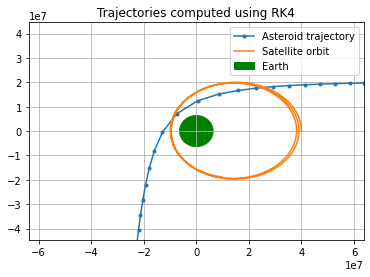

In [9]:
G = 6.67408e-11
R_EARTH = 6.371e6
M_EARTH = 5.9722e24

def centripetal(t, y):
    dist_square = y[0] ** 2 + y[1] ** 2
    force_magnitude = G * M_EARTH / dist_square
    f0 = y[2]
    f1 = y[3]
    if np.isclose(y[0], 0, atol=1e-9):
        f2 = 0
        f3 = - force_magnitude * np.sign(y[1])
    elif y[0] > 0:
        x = y[1] / y[0]
        f2 = - force_magnitude / np.sqrt(1 + x**2)
        f3 = - force_magnitude * x / np.sqrt(1 + x**2)
    else:
        x = y[1] / y[0]
        f2 = force_magnitude / np.sqrt(1 + x**2)
        f3 = force_magnitude * x / np.sqrt(1 + x**2)
    return np.array([f0, f1, f2, f3])

t0 = 0
dt = 1000
n = 100

x0_a = (1e8, 2e7)
v0_a = (-5_000, 0)
y0_a = np.concatenate((x0_a, v0_a))

x0_b = (4e7, 0)
v0_b = (0, 2_000)
y0_b = np.concatenate((x0_b, v0_b))

y_a = solve_ode(centripetal, y0_a, t0, dt, n, method='rk4')
y_b = solve_ode(centripetal, y0_b, t0, dt, n, method='rk4')


fig, ax = plt.subplots()
plt.title('Trajectories computed using RK4')
plt.plot(y_a[:,0], y_a[:,1], '.-', label='Asteroid trajectory')
plt.plot(y_b[:,0], y_b[:,1], '-', label='Satellite orbit')
circle = Circle((0, 0), R_EARTH, color='g', label='Earth')
ax.add_patch(circle)
border=R_EARTH*10
plt.xlim(-border, border) ; plt.ylim(-border * .7, border * .7)
plt.legend()
plt.grid()

### Electromagnetism

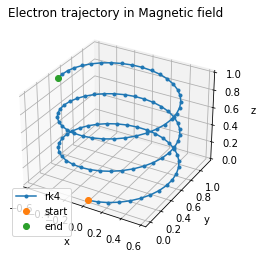

In [10]:
# Particule in magnetic field
q_e = -1.602e-19 # Electron charge
m_e = 9.109e-31 # Electron mass
coef = q_e / m_e
E = (0, 0, 0) # Electric field
B = (0, 0, 1e-9) # Magnetic field

def f_electromagnetic_field(t, y):
    f0 = y[3]
    f1 = y[4]
    f2 = y[5]
    f3 = coef * (E[0] + y[4] * B[2] - y[5] * B[1])
    f4 = coef * (E[1] + y[5] * B[0] - y[3] * B[2])
    f5 = coef * (E[2] + y[3] * B[1] - y[4] * B[0])
    return np.array([f0, f1, f2, f3, f4, f5])

x0 = (0, 0, 0)
v0 = (100, 0, 10)
y0 = np.concatenate((x0, v0))
t0 = 0
n = 100
dt = 0.001

#y_euler = solve_ode(f_electromagnetic_field, y0, t0, dt, n, method='rk4')
#y_heun = solve_ode(f_electromagnetic_field, y0, t0, dt, n, method='heun')
y_rk4 = solve_ode(f_electromagnetic_field, y0, t0, dt, n, method='rk4')

fig = plt.figure()
ax = fig.gca(projection="3d")
#ax.plot3D(y_euler[:, 0], y_euler[:, 1], y_euler[:, 2], '.-', label='rk4')
#ax.plot3D(y_heun[:, 0], y_heun[:, 1], y_heun[:, 2], '.-', label='heun')
ax.plot3D(y_rk4[:, 0], y_rk4[:, 1], y_rk4[:, 2], '.-', label='rk4')
ax.plot3D(y_rk4[0, 0], y_rk4[0, 1], y_rk4[0, 2], 'o', label='start')
ax.plot3D(y_rk4[-1, 0], y_rk4[-1, 1], y_rk4[-1, 2], 'o', label='end')
plt.title('Electron trajectory in Magnetic field')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.draw()